In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
#Importing all the necessory libraries

In [2]:
df=pd.read_csv('CIC-IoT23-00144.csv')

In [3]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
print("Encoded labels:", np.unique(df['label']))

Encoded labels: [0 1 2 3 4 5 6 7 8]


In [4]:
X=df.drop(columns='label')
y=df['label']

In [5]:
X = X.values
y = y.values  # optional, if needed by your classifier


In [6]:
selected_features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Srate', 'fin_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'rst_count', 'HTTP', 'SSH', 'IRC', 'DHCP', 'ICMP', 'IPv', 'AVG', 'Std', 'IAT', 'Number', 'Variance']
X_selected = df[selected_features].values

In [7]:
df_selected = df[selected_features + ['label']]
print(df_selected.head())

   flow_duration  Header_Length  Protocol Type  Duration      Srate  \
0       0.000000          54.00            6.0      64.0   0.402005   
1       0.000000          54.00            6.0      64.0  29.249152   
2       7.148071         241.21            6.0      64.0   0.499301   
3       0.000000           0.00            1.0      64.0   1.443992   
4       5.769755         108.00            6.0      64.0   0.346635   

   fin_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   ece_flag_number  ...  IRC  DHCP  ICMP  IPv        AVG       Std  \
0              0.0  ...  0.0   0.0   0.0  1.0  54.000000  0.0000

In [8]:
df_selected

,flow_duration,Header_Length,Protocol Type,Duration,Srate,fin_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,IRC,DHCP,ICMP,IPv,AVG,Std,IAT,Number,Variance,label
0,0.000000,54.00,6.00,64.00,0.402005,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.000000,0.000000,8.308997e+07,9.5,0.00,1
1,0.000000,54.00,6.00,64.00,29.249152,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.000000,0.000000,8.308935e+07,9.5,0.00,1
2,7.148071,241.21,6.00,64.00,0.499301,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.469661,1.289955,8.297241e+07,9.5,0.25,2
3,0.000000,0.00,1.00,64.00,1.443992,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,42.000000,0.000000,8.313274e+07,9.5,0.00,1
4,5.769755,108.00,6.00,64.00,0.346635,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,54.000000,0.000000,8.306854e+07,9.5,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244854,0.000000,0.00,44.24,75.46,11.343913,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,533.074610,43.771784,8.365138e+07,9.5,0.18,5
244855,0.041362,13585.00,17.00,64.00,7361.789395,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,0.000000,8.309870e+07,9.5,0.00,1
244856,0.024762,27075.00,17.00,64.00,21860.178277,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,50.000000,0.000000,8.301549e+07,9.5,0.00,2
244857,0.000000,0.00,1.00,64.00,69.689031,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,42.000000,0.000000,8.314997e+07,9.5,0.00,1


In [9]:
df=df_selected

In [10]:
X=df.drop(columns='label')
y=df['label']

In [11]:
X = X.values
y = y.values  # optional, if needed by your classifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures label distribution is preserved in both sets
)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [15]:
y_train_balanced = y_train

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import time

Best Parameters: {'class_weight': 'balanced', 'max_depth': 40, 'min_samples_leaf': 32, 'min_samples_split': 5}
Training time: 2.5841 seconds
Prediction time: 0.0095 seconds
Accuracy: 0.9847
Precision (macro): 0.6454
Recall (macro): 0.8057
F1-score (macro): 0.6680


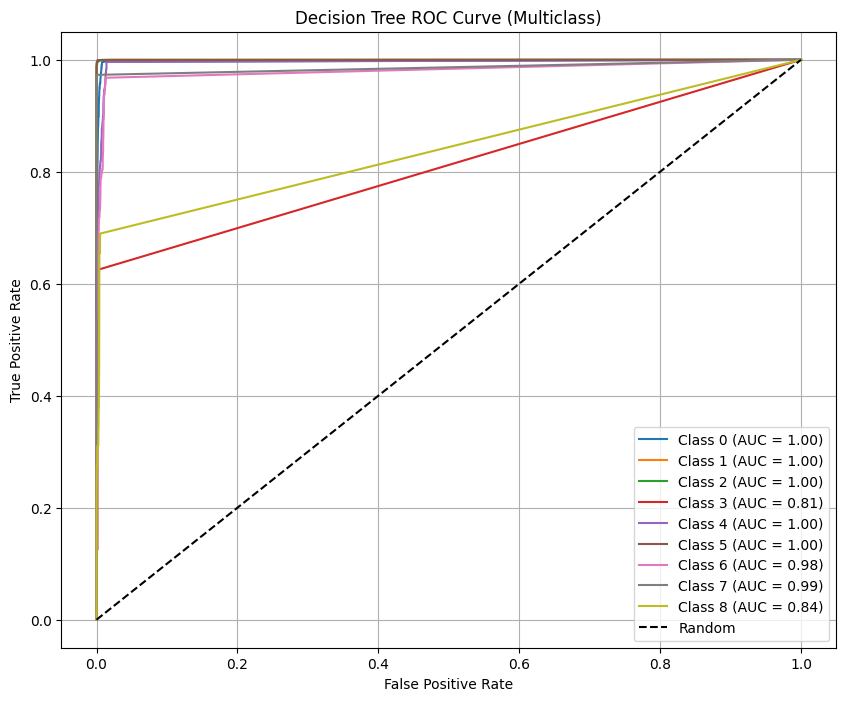

In [17]:
param_grid = {
    'max_depth': [40],
    'min_samples_split': [5],
    'min_samples_leaf': [32],
    'class_weight': ['balanced'],
}

# Grid Search with cross-validation
base_dt = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(base_dt, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_balanced)

# Best model
dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Train Decision Tree and measure training time
start_train = time.time()
dt.fit(X_train_scaled, y_train_balanced)
train_time = time.time() - start_train

# Predict and measure prediction time
start_pred = time.time()
y_pred = dt.predict(X_test_scaled)
pred_time = time.time() - start_pred

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for Multiclass
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = dt.predict_proba(X_test_scaled)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


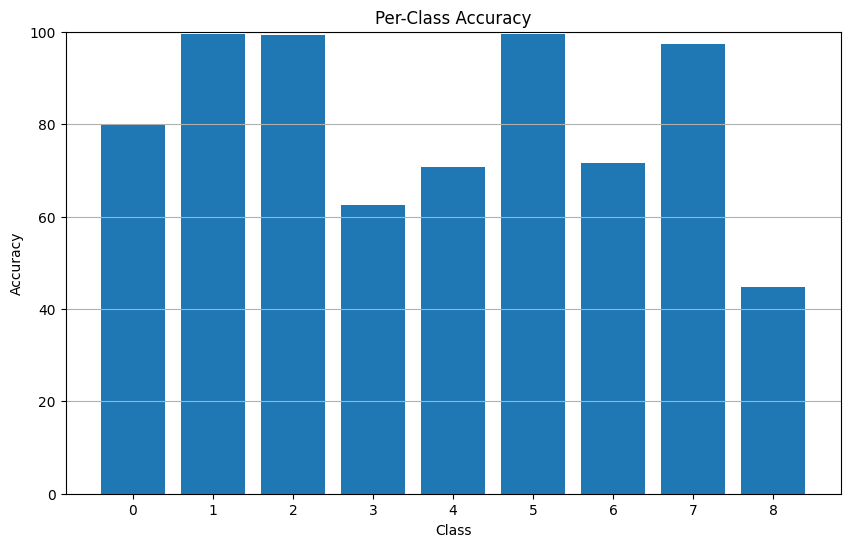

In [18]:

from sklearn.metrics import confusion_matrix

# Plot accuracy for all classes

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2830
[LightGBM] [Info] Number of data points in the train set: 195887, number of used featu

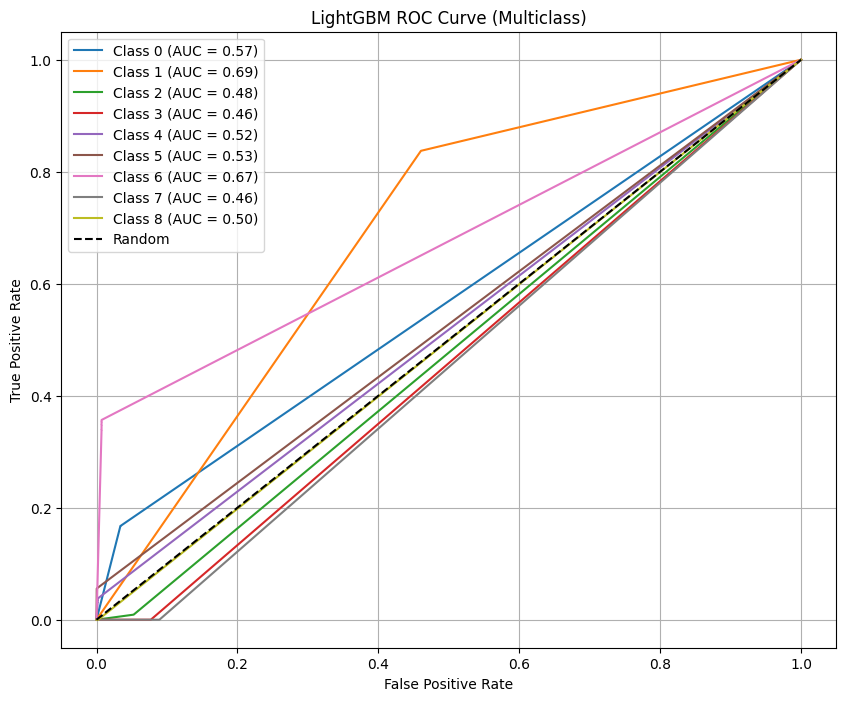

In [19]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
param_grid = {
    'objective': ['multiclass'],
    'boosting_type': ['gbdt'],
    'num_class': [n_classes],
    'num_leaves': [64],
    'max_depth': [16],
    'min_data_in_leaf': [100],
    'learning_rate': [0.05],
    'lambda_l1': [0.1],
    'lambda_l2': [1],
}


# Grid Search with cross-validation
base_lgbm = lgb.LGBMClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(base_lgbm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_balanced)

# Best model
lgbm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

start_train = time.time()
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train_balanced)
train_time = time.time() - start_train

# Predict and measure prediction time
start_pred = time.time()
y_pred_lgbm = lgbm.predict(X_test_scaled)
pred_time = time.time() - start_pred

# Metrics
accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_lgbm, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_lgbm, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# ROC Curve for Multiclass
y_score_lgbm = lgbm.predict_proba(X_test_scaled)
fpr_lgbm = dict()
tpr_lgbm = dict()
roc_auc_lgbm = dict()
for i in range(n_classes):
    fpr_lgbm[i], tpr_lgbm[i], _ = roc_curve(y_test_bin[:, i], y_score_lgbm[:, i])
    roc_auc_lgbm[i] = auc(fpr_lgbm[i], tpr_lgbm[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_lgbm[i], tpr_lgbm[i], label=f'Class {i} (AUC = {roc_auc_lgbm[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()

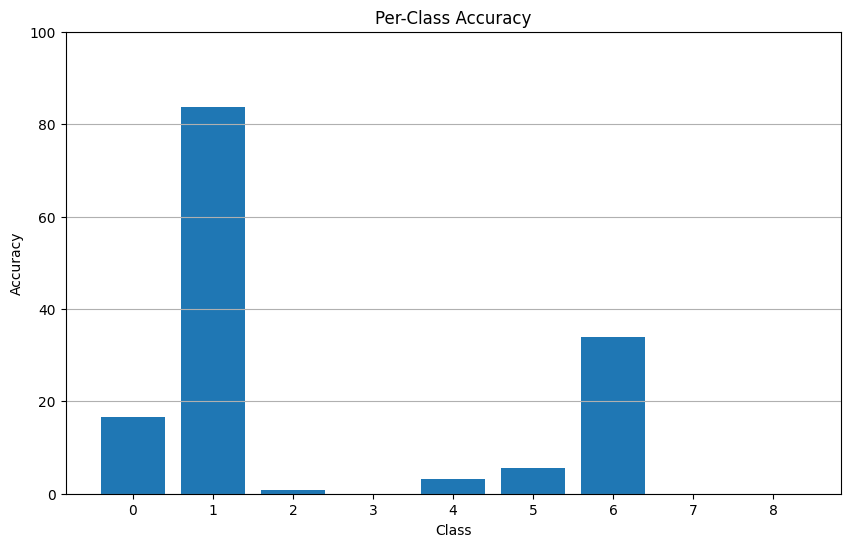

In [21]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Best Parameters: {'n_neighbors': 10}
Training time: 0.0285 seconds
Prediction time: 20.0794 seconds
Accuracy: 0.9434
Precision (macro): 0.7539
Recall (macro): 0.6205
F1-score (macro): 0.6310


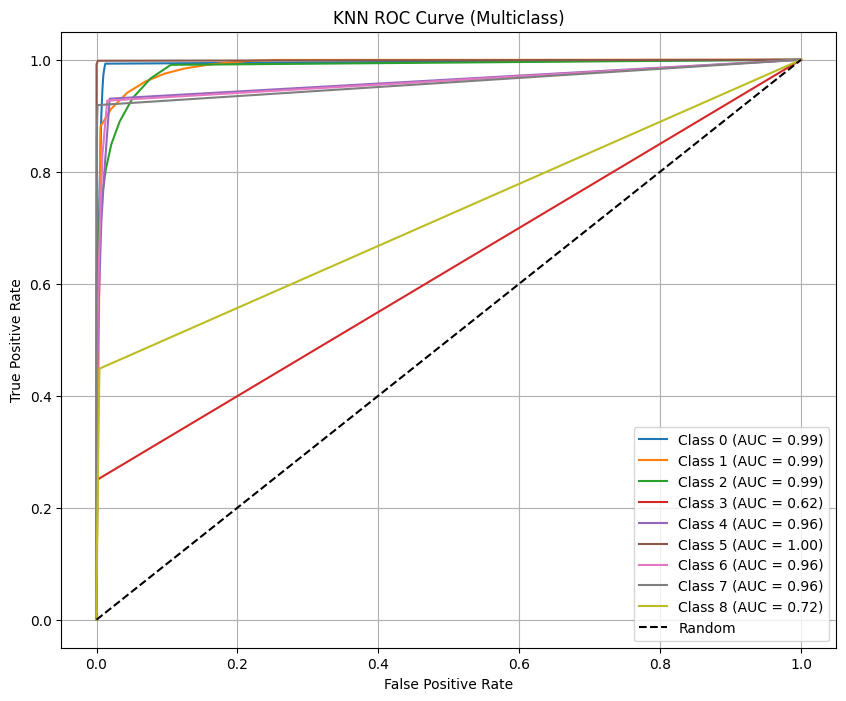

In [22]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [10],
}


# Grid Search with cross-validation
base_knn = KNeighborsClassifier(n_jobs=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(base_knn, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_balanced)

# Best model
knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
start_train = time.time()
knn.fit(X_train_scaled, y_train_balanced)
train_time = time.time() - start_train

# 2. Predict and measure prediction time
start_pred = time.time()
y_pred_knn = knn.predict(X_test_scaled)
pred_time = time.time() - start_pred

# 3. Metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred_knn, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_knn, average='macro', zero_division=0)

print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {pred_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# 4. ROC Curve for Multiclass
y_score_knn = knn.predict_proba(X_test_scaled)
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()

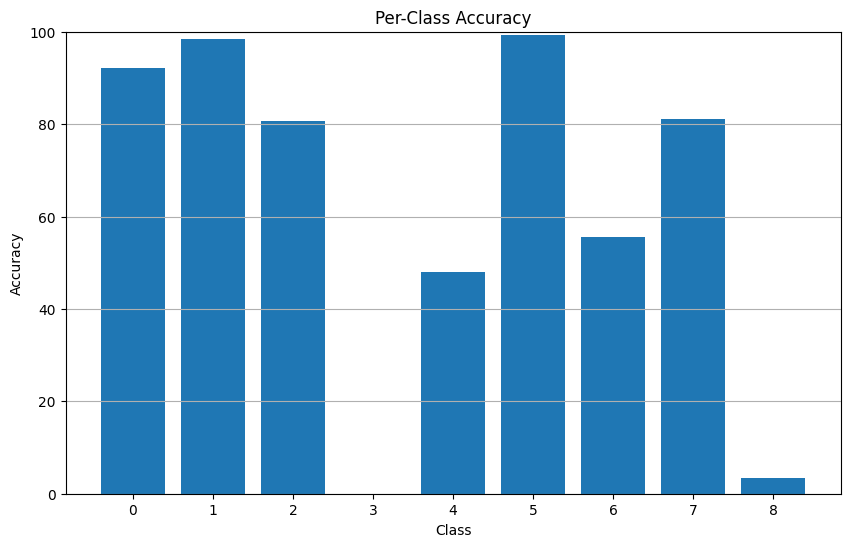

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

Best BiLSTM Params: {'hidden_dim': 512, 'num_layers': 2, 'lr': 0.001, 'batch_size': 256}
Best Accuracy: 0.9902
Training time: 3609.5794 seconds
Prediction time: 7.8988 seconds
Accuracy: 0.9902
Precision (macro): 0.7214
Recall (macro): 0.6767
F1-score (macro): 0.6892


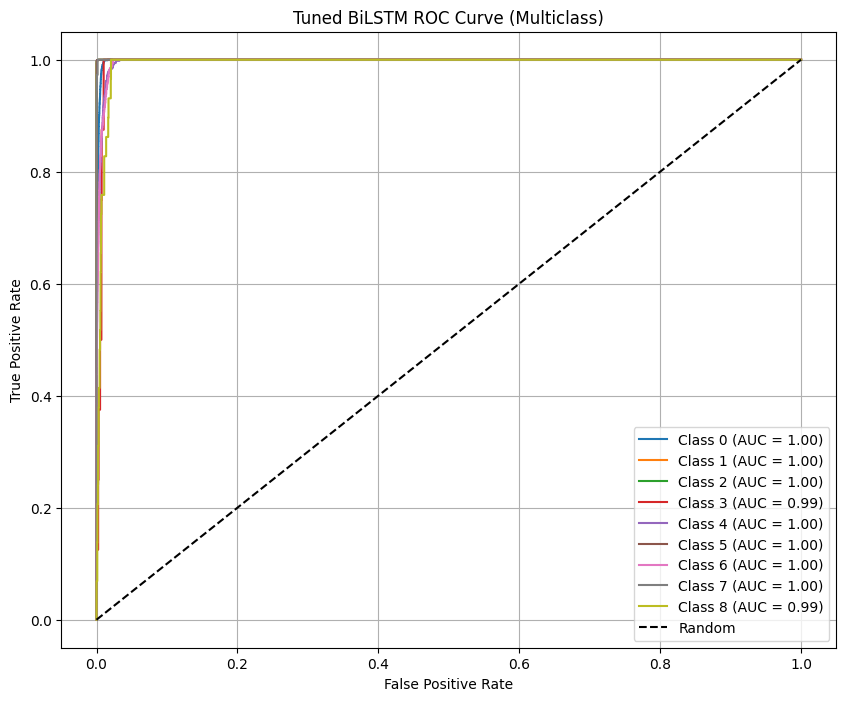

In [26]:
# Hyperparameter grid for BiLSTM tuning
bilstm_param_grid = {
    'hidden_dim': [ 512],
    'num_layers': [ 2],
    'lr': [1e-3],
    'batch_size': [ 256]
}

best_score = 0
best_params = None
results = []

for hidden_dim in bilstm_param_grid['hidden_dim']:
    for num_layers in bilstm_param_grid['num_layers']:
        for lr in bilstm_param_grid['lr']:
            for batch_size in bilstm_param_grid['batch_size']:
                # Prepare data loaders
                X_train_seq = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)
                X_test_seq = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
                y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
                y_test_tensor = torch.tensor(y_test, dtype=torch.long)

                train_dataset = TensorDataset(X_train_seq, y_train_tensor)
                test_dataset = TensorDataset(X_test_seq, y_test_tensor)
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

                # Define model
                class BiLSTM(nn.Module):
                    def __init__(self, input_dim, hidden_dim, num_classes, num_layers=1):
                        super().__init__()
                        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, 
                                            batch_first=True, bidirectional=True)
                        self.fc = nn.Linear(hidden_dim * 2, num_classes)
                    def forward(self, x):
                        out, _ = self.lstm(x)
                        out = out[:, -1, :]
                        out = self.fc(out)
                        return out

                device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                input_dim = X_train_scaled.shape[1]
                model = BiLSTM(input_dim, hidden_dim, n_classes, num_layers).to(device)
                criterion = nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)

                # Training
                start_train = time.time()
                epochs = 20
                model.train()
                for epoch in range(epochs):
                    for xb, yb in train_loader:
                        xb, yb = xb.to(device), yb.to(device)
                        optimizer.zero_grad()
                        out = model(xb)
                        loss = criterion(out, yb)
                        loss.backward()
                        optimizer.step()
                train_time = time.time() - start_train

                # Prediction
                model.eval()
                start_pred = time.time()
                all_preds = []
                all_probs = []
                with torch.no_grad():
                    for xb, _ in test_loader:
                        xb = xb.to(device)
                        logits = model(xb)
                        probs = torch.softmax(logits, dim=1)
                        preds = torch.argmax(probs, dim=1)
                        all_preds.append(preds.cpu())
                        all_probs.append(probs.cpu())
                pred_time = time.time() - start_pred

                y_pred_bilstm = torch.cat(all_preds).numpy()
                y_score_bilstm = torch.cat(all_probs).numpy()

                # Metrics
                accuracy = accuracy_score(y_test, y_pred_bilstm)
                precision = precision_score(y_test, y_pred_bilstm, average='macro', zero_division=0)
                recall = recall_score(y_test, y_pred_bilstm, average='macro', zero_division=0)
                f1 = f1_score(y_test, y_pred_bilstm, average='macro', zero_division=0)

                results.append({
                    'hidden_dim': hidden_dim,
                    'num_layers': num_layers,
                    'lr': lr,
                    'batch_size': batch_size,
                    'train_time': train_time,
                    'pred_time': pred_time,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                })

                if accuracy > best_score:
                    best_score = accuracy
                    best_params = {
                        'hidden_dim': hidden_dim,
                        'num_layers': num_layers,
                        'lr': lr,
                        'batch_size': batch_size
                    }
                    best_y_pred = y_pred_bilstm
                    best_y_score = y_score_bilstm

print("Best BiLSTM Params:", best_params)
print("Best Accuracy: {:.4f}".format(best_score))

# Show metrics for best model
print("Training time: {:.4f} seconds".format([r for r in results if all(r[k]==best_params[k] for k in best_params)][0]['train_time']))
print("Prediction time: {:.4f} seconds".format([r for r in results if all(r[k]==best_params[k] for k in best_params)][0]['pred_time']))
print("Accuracy: {:.4f}".format([r for r in results if all(r[k]==best_params[k] for k in best_params)][0]['accuracy']))
print("Precision (macro): {:.4f}".format([r for r in results if all(r[k]==best_params[k] for k in best_params)][0]['precision']))
print("Recall (macro): {:.4f}".format([r for r in results if all(r[k]==best_params[k] for k in best_params)][0]['recall']))
print("F1-score (macro): {:.4f}".format([r for r in results if all(r[k]==best_params[k] for k in best_params)][0]['f1']))

# ROC Curve for Multiclass (best model)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr_bilstm = dict()
tpr_bilstm = dict()
roc_auc_bilstm = dict()
for i in range(n_classes):
    fpr_bilstm[i], tpr_bilstm[i], _ = roc_curve(y_test_bin[:, i], best_y_score[:, i])
    roc_auc_bilstm[i] = auc(fpr_bilstm[i], tpr_bilstm[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_bilstm[i], tpr_bilstm[i], label=f'Class {i} (AUC = {roc_auc_bilstm[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned BiLSTM ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()

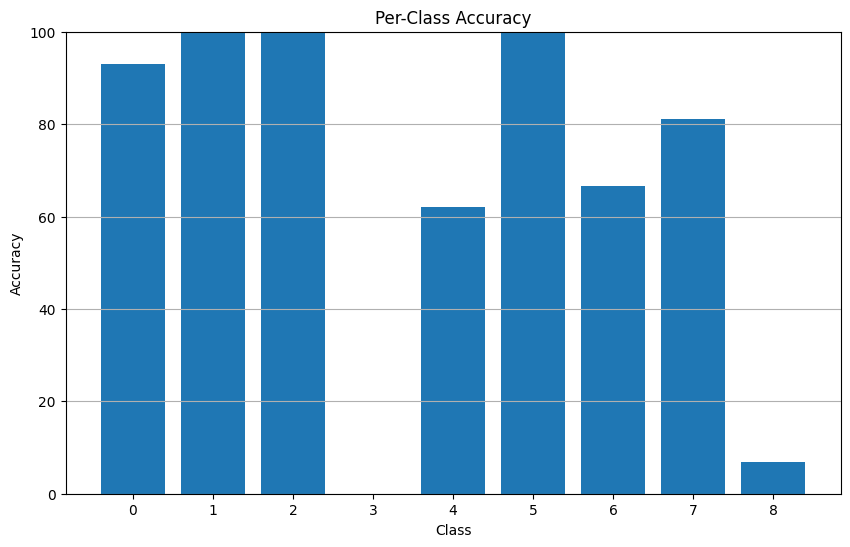

In [28]:
# Compute confusion matrix
cm = confusion_matrix(y_test, best_y_pred, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Best MLP Params: {'hidden_dim1': 256, 'hidden_dim2': 128, 'lr': 0.0005, 'batch_size': 256}
Best Accuracy: 0.9867
Training time: 96.2765 seconds
Prediction time: 0.5446 seconds
Accuracy: 0.9867
Precision (macro): 0.7851
Recall (macro): 0.6436
F1-score (macro): 0.6568


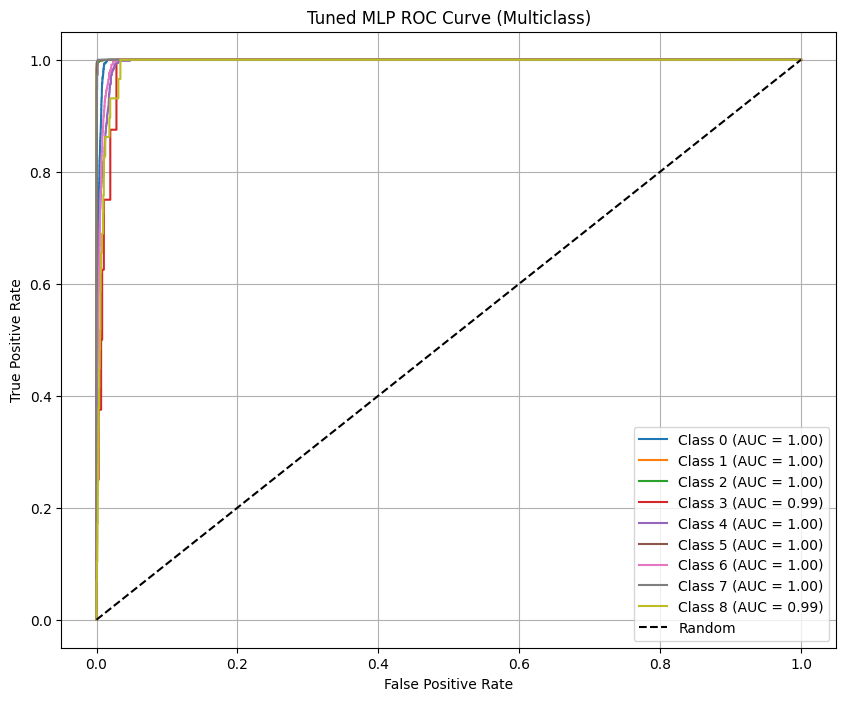

In [29]:
# Hyperparameter grid for MLP tuning
mlp_param_grid = {
    'hidden_dim1': [256],
    'hidden_dim2': [128],
    'lr': [1e-3, 5e-4],
    'batch_size': [256]
}

best_score = 0
best_params = None
results_mlp = []

for hidden_dim1 in mlp_param_grid['hidden_dim1']:
    for hidden_dim2 in mlp_param_grid['hidden_dim2']:
        for lr in mlp_param_grid['lr']:
            for batch_size in mlp_param_grid['batch_size']:
                # Prepare data loaders
                train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train_balanced, dtype=torch.long))
                test_dataset = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

                # Define MLP model
                class TunedMLP(nn.Module):
                    def __init__(self, input_dim, num_classes, h1, h2):
                        super().__init__()
                        self.model = nn.Sequential(
                            nn.Linear(input_dim, h1),
                            nn.ReLU(),
                            nn.Linear(h1, h2),
                            nn.ReLU(),
                            nn.Linear(h2, num_classes)
                        )
                    def forward(self, x):
                        return self.model(x)

                device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                mlp = TunedMLP(X_train_scaled.shape[1], n_classes, hidden_dim1, hidden_dim2).to(device)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(mlp.parameters(), lr=lr)

                # Training
                start_train = time.time()
                epochs = 20
                mlp.train()
                for epoch in range(epochs):
                    for xb, yb in train_loader:
                        xb, yb = xb.to(device), yb.to(device)
                        optimizer.zero_grad()
                        out = mlp(xb)
                        loss = criterion(out, yb)
                        loss.backward()
                        optimizer.step()
                train_time = time.time() - start_train

                # Prediction
                mlp.eval()
                start_pred = time.time()
                all_preds = []
                all_probs = []
                with torch.no_grad():
                    for xb, _ in test_loader:
                        xb = xb.to(device)
                        logits = mlp(xb)
                        probs = torch.softmax(logits, dim=1)
                        preds = torch.argmax(probs, dim=1)
                        all_preds.append(preds.cpu())
                        all_probs.append(probs.cpu())
                pred_time = time.time() - start_pred

                y_pred_mlp_tuned = torch.cat(all_preds).numpy()
                y_score_mlp_tuned = torch.cat(all_probs).numpy()

                # Metrics
                accuracy = accuracy_score(y_test, y_pred_mlp_tuned)
                precision = precision_score(y_test, y_pred_mlp_tuned, average='macro', zero_division=0)
                recall = recall_score(y_test, y_pred_mlp_tuned, average='macro', zero_division=0)
                f1 = f1_score(y_test, y_pred_mlp_tuned, average='macro', zero_division=0)

                results_mlp.append({
                    'hidden_dim1': hidden_dim1,
                    'hidden_dim2': hidden_dim2,
                    'lr': lr,
                    'batch_size': batch_size,
                    'train_time': train_time,
                    'pred_time': pred_time,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                })

                if accuracy > best_score:
                    best_score = accuracy
                    best_params = {
                        'hidden_dim1': hidden_dim1,
                        'hidden_dim2': hidden_dim2,
                        'lr': lr,
                        'batch_size': batch_size
                    }
                    best_y_pred_mlp = y_pred_mlp_tuned
                    best_y_score_mlp = y_score_mlp_tuned

print("Best MLP Params:", best_params)
print("Best Accuracy: {:.4f}".format(best_score))

# Show metrics for best model
best_result = [r for r in results_mlp if all(r[k]==best_params[k] for k in best_params)][0]
print("Training time: {:.4f} seconds".format(best_result['train_time']))
print("Prediction time: {:.4f} seconds".format(best_result['pred_time']))
print("Accuracy: {:.4f}".format(best_result['accuracy']))
print("Precision (macro): {:.4f}".format(best_result['precision']))
print("Recall (macro): {:.4f}".format(best_result['recall']))
print("F1-score (macro): {:.4f}".format(best_result['f1']))

# ROC Curve for Multiclass (best model)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr_mlp_tuned = dict()
tpr_mlp_tuned = dict()
roc_auc_mlp_tuned = dict()
for i in range(n_classes):
    fpr_mlp_tuned[i], tpr_mlp_tuned[i], _ = roc_curve(y_test_bin[:, i], best_y_score_mlp[:, i])
    roc_auc_mlp_tuned[i] = auc(fpr_mlp_tuned[i], tpr_mlp_tuned[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_mlp_tuned[i], tpr_mlp_tuned[i], label=f'Class {i} (AUC = {roc_auc_mlp_tuned[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned MLP ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()

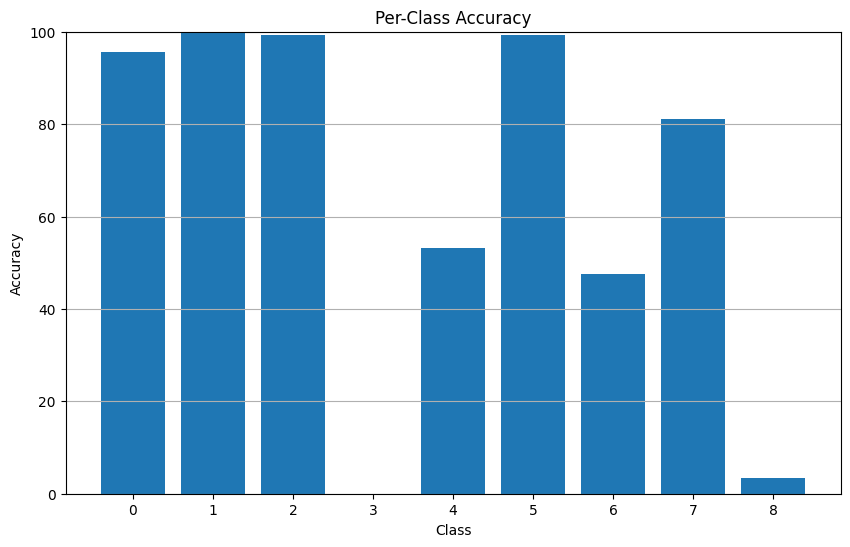

In [31]:
# Compute confusion matrix
cm = confusion_matrix(y_test, best_y_pred_mlp, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

Best DNN Params: {'hidden_dim1': 512, 'hidden_dim2': 256, 'lr': 0.001, 'batch_size': 512}
Best Accuracy: 0.9804
Training time: 135.5574 seconds
Prediction time: 0.8209 seconds
Accuracy: 0.9804
Precision (macro): 0.6664
Recall (macro): 0.6540
F1-score (macro): 0.6567


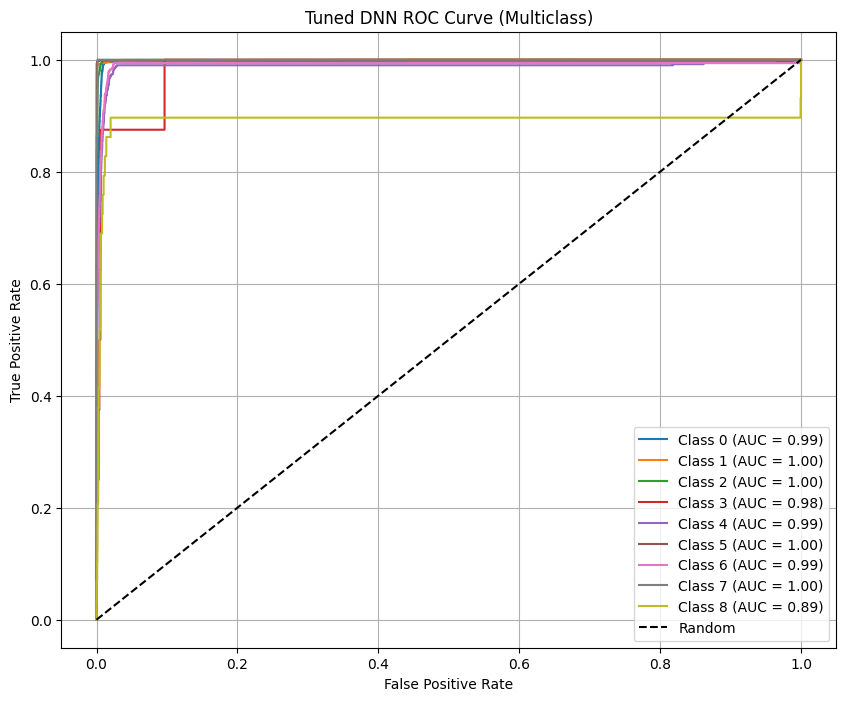

In [32]:
# Hyperparameter grid for DNN tuning
dnn_param_grid = {
    'hidden_dim1': [512],
    'hidden_dim2': [256],
    'lr': [1e-3],
    'batch_size': [512]
}

best_score = 0
best_params = None
results_dnn = []

for hidden_dim1 in dnn_param_grid['hidden_dim1']:
    for hidden_dim2 in dnn_param_grid['hidden_dim2']:
        for lr in dnn_param_grid['lr']:
            for batch_size in dnn_param_grid['batch_size']:
                # Prepare data loaders
                train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train_balanced, dtype=torch.long))
                test_dataset = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

                # Define DNN model
                class TunedDNN(nn.Module):
                    def __init__(self, input_dim, num_classes, h1, h2):
                        super().__init__()
                        self.model = nn.Sequential(
                            nn.Linear(input_dim, h1),
                            nn.ReLU(),
                            nn.BatchNorm1d(h1),
                            nn.Linear(h1, h2),
                            nn.ReLU(),
                            nn.BatchNorm1d(h2),
                            nn.Linear(h2, num_classes)
                        )
                    def forward(self, x):
                        return self.model(x)

                device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
                dnn = TunedDNN(X_train_scaled.shape[1], n_classes, hidden_dim1, hidden_dim2).to(device)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(dnn.parameters(), lr=lr)

                # Training
                start_train = time.time()
                epochs = 20
                dnn.train()
                for epoch in range(epochs):
                    for xb, yb in train_loader:
                        xb, yb = xb.to(device), yb.to(device)
                        optimizer.zero_grad()
                        out = dnn(xb)
                        loss = criterion(out, yb)
                        loss.backward()
                        optimizer.step()
                train_time = time.time() - start_train

                # Prediction
                dnn.eval()
                start_pred = time.time()
                all_preds = []
                all_probs = []
                with torch.no_grad():
                    for xb, _ in test_loader:
                        xb = xb.to(device)
                        logits = dnn(xb)
                        probs = torch.softmax(logits, dim=1)
                        preds = torch.argmax(probs, dim=1)
                        all_preds.append(preds.cpu())
                        all_probs.append(probs.cpu())
                pred_time = time.time() - start_pred

                y_pred_dnn_tuned = torch.cat(all_preds).numpy()
                y_score_dnn_tuned = torch.cat(all_probs).numpy()

                # Metrics
                accuracy = accuracy_score(y_test, y_pred_dnn_tuned)
                precision = precision_score(y_test, y_pred_dnn_tuned, average='macro', zero_division=0)
                recall = recall_score(y_test, y_pred_dnn_tuned, average='macro', zero_division=0)
                f1 = f1_score(y_test, y_pred_dnn_tuned, average='macro', zero_division=0)

                results_dnn.append({
                    'hidden_dim1': hidden_dim1,
                    'hidden_dim2': hidden_dim2,
                    'lr': lr,
                    'batch_size': batch_size,
                    'train_time': train_time,
                    'pred_time': pred_time,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1
                })

                if accuracy > best_score:
                    best_score = accuracy
                    best_params = {
                        'hidden_dim1': hidden_dim1,
                        'hidden_dim2': hidden_dim2,
                        'lr': lr,
                        'batch_size': batch_size
                    }
                    best_y_pred_dnn = y_pred_dnn_tuned
                    best_y_score_dnn = y_score_dnn_tuned

print("Best DNN Params:", best_params)
print("Best Accuracy: {:.4f}".format(best_score))

# Show metrics for best model
best_result = [r for r in results_dnn if all(r[k]==best_params[k] for k in best_params)][0]
print("Training time: {:.4f} seconds".format(best_result['train_time']))
print("Prediction time: {:.4f} seconds".format(best_result['pred_time']))
print("Accuracy: {:.4f}".format(best_result['accuracy']))
print("Precision (macro): {:.4f}".format(best_result['precision']))
print("Recall (macro): {:.4f}".format(best_result['recall']))
print("F1-score (macro): {:.4f}".format(best_result['f1']))

# ROC Curve for Multiclass (best model)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr_dnn_tuned = dict()
tpr_dnn_tuned = dict()
roc_auc_dnn_tuned = dict()
for i in range(n_classes):
    fpr_dnn_tuned[i], tpr_dnn_tuned[i], _ = roc_curve(y_test_bin[:, i], best_y_score_dnn[:, i])
    roc_auc_dnn_tuned[i] = auc(fpr_dnn_tuned[i], tpr_dnn_tuned[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr_dnn_tuned[i], tpr_dnn_tuned[i], label=f'Class {i} (AUC = {roc_auc_dnn_tuned[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned DNN ROC Curve (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()

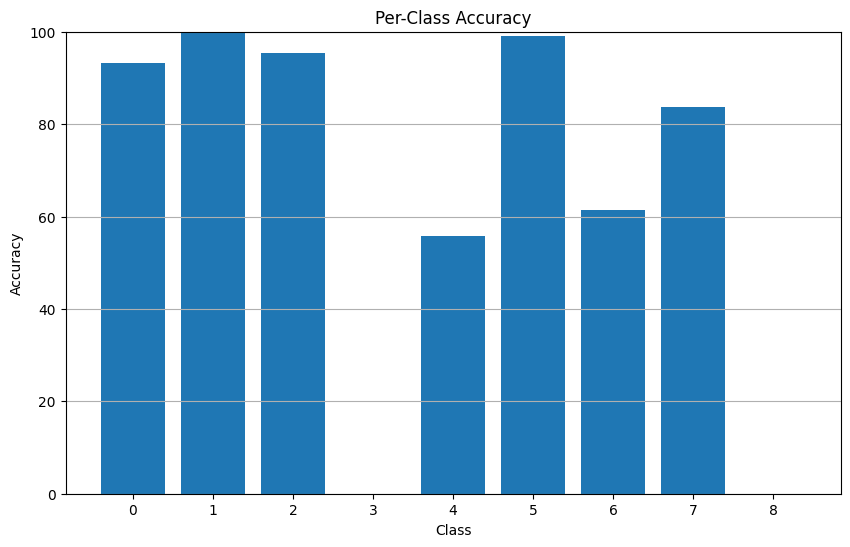

In [33]:
# Compute confusion matrix
cm = confusion_matrix(y_test, best_y_pred_dnn, labels=np.arange(n_classes))

# Per-class accuracy: diagonal / row sum
per_class_accuracy = (cm.diagonal() / cm.sum(axis=1) )*100

plt.figure(figsize=(10, 6))
plt.bar(range(n_classes), per_class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy')
plt.xticks(range(n_classes))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()